# Basins of Attraction

When using Newton's method, one must be careful to choose a good initial starting point. Otherwise the problem may failed to converge, or worse it may converge to different maxima/minima/saddle point which we didn't intend. The regions which converge to a particular point are called the "basins of attraction".

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from newton import find_basins_of_attraction, find_basins_of_attraction_with_descent, find_basins_of_attraction_with_line_search
from utils import save_figure

In [2]:
from IPython.core.magic import register_cell_magic

# Allows skipping of cellings using %%skip command to avoid cells with long runtimes
@register_cell_magic
def skip(line, cell):
	return

Example:

$$ f(x, y) = x^4 + y^4 + 4xy$$

Minima at (1, 1), (-1, -1) and saddle point (0, 0).

In [3]:
def f(x): 
	return x[0]**4 + x[1]**4 - 4*x[0]*x[1]

We will plot the basins of attraction first using standard Newton's method.

In [4]:
# %%skip

res1 = 1000
roots1 = [np.array([1, 1]), np.array([-1, -1]), np.array([0, 0])]
basins1, X1, Y1 = find_basins_of_attraction(f, roots1, res=res1, xlim=(-2, 2), ylim=(-2, 2))

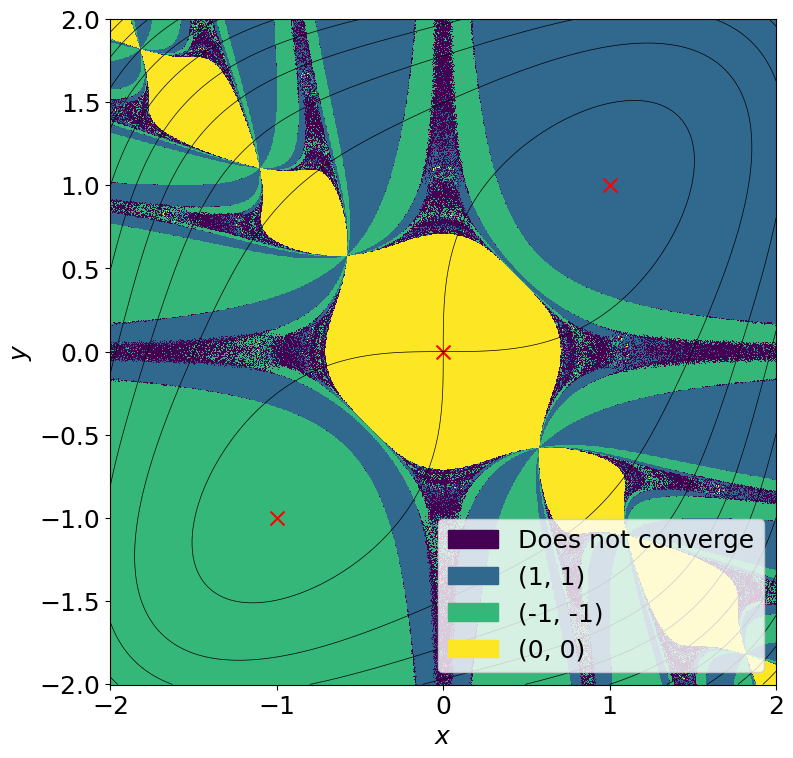

In [10]:
# %%skip

import matplotlib.patches as mpatches

fig, ax  = plt.subplots(figsize=(8, 8))
ax.set_aspect(aspect=1)

cmap = plt.get_cmap("viridis", 4)

mesh = plt.pcolormesh(X1, Y1, basins1, shading='auto', cmap=cmap)

ax.contour(X1, Y1, f([X1, Y1]), levels=10, colors='black', linewidths=0.5)

ax.scatter([1, -1, 0], [1, -1, 0], color="red", marker="x", s=100)

labels = {
	0: "Does not converge",
	1: "(1, 1)",
	2: "(-1, -1)",
	3: "(0, 0)"
}
patches = [mpatches.Patch(color=cmap(i), label=labels[i]) for i in range(len(labels))]

ax.legend(handles=patches, loc="lower right", fontsize=18)

ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)

ax.tick_params(labelsize=18)

plt.tight_layout()
save_figure(fig)
plt.show()

Now we will plot the basins of attraction for the same function, but this time using the hybrid method: using Steepest Descent for a fixed number of iterations and then switching to Newton's method.

In [6]:
# %%skip

res2 = 1000
roots2 = [np.array([1, 1]), np.array([-1, -1]), np.array([0, 0])]
basins2, X2, Y2 = find_basins_of_attraction_with_descent(f, roots2, res=res2, xlim=(-2, 2), ylim=(-2, 2), ascent=False)

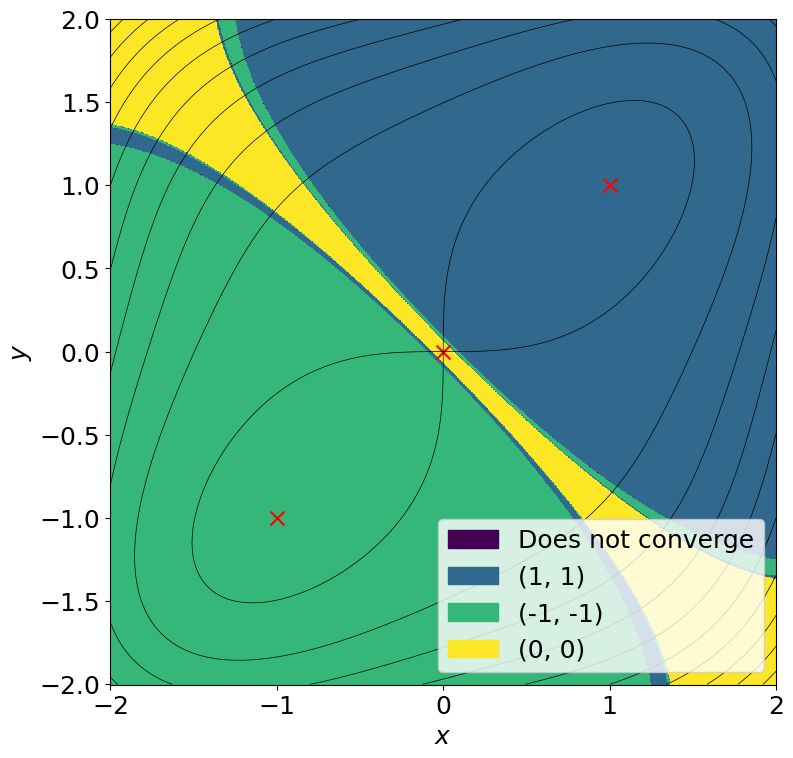

In [11]:
# %%skip

import matplotlib.patches as mpatches

fig, ax  = plt.subplots(figsize=(8, 8))
ax.set_aspect(aspect=1)

cmap = plt.get_cmap("viridis", 4)

mesh = plt.pcolormesh(X2, Y2, basins2, cmap=cmap)

ax.contour(X2, Y2, f([X2, Y2]), levels=10, colors='black', linewidths=0.5)

ax.scatter([1, -1, 0], [1, -1, 0], color='red', marker='x', s=100)

labels = {
	0: "Does not converge",
	1: "(1, 1)",
	2: "(-1, -1)",
	3: "(0, 0)"
}
patches = [mpatches.Patch(color=cmap(i), label=labels[i]) for i in range(len(labels))]

ax.legend(handles=patches, loc="lower right", fontsize=18)

ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)

ax.tick_params(labelsize=18)

plt.tight_layout()
save_figure(fig)
plt.show()